# DataSet 

<div style="background-color:#333801 padding:rgb(0%, 100%, 0%); font-size:15px">

|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | id |  |                
| **2** | Sex |male or female ("M" or "F") |                        
| **3** |  Age| Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous |
| **4** | Education |  The level of education of the patient (categorical values - 1,2,3,4)
 |
| **5** | is_smoking: | whether or not the patient is a current smoker ("YES" or "NO") |                     
| **6** | Cigs Per Day |the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)|
| **7** | BP Meds | whether or not the patient was on blood pressure medication (Nominal) |              
| **8** | Prevalent Stroke | whether or not the patient had previously had a stroke (Nominal)  |                      
| **9** | Prevalent Hyp |   whether or not the patient was hypertensive (Nominal) |
| **10** | Diabetes | whether or not the patient had diabetes (Nominal) |
| **11** | Tot Chol | total cholesterol level (Continuous) |                      
| **12** | Dia BP | diastolic blood pressure (Continuous)|
| **13** | BMI| Body Mass Index (Continuous) |              
| **14** | Heart Rate |  heart rate (Continuous - In medical research, variables such as heart rate though in fac tdiscrete, yet are considered continuous because of large number of possible values.)  |                      
| **15** | Glucose| glucose level (Continuous) |
| **16** | sysBP |systolic blood pressure (Continuous) |
| **17** |  TenYearCHD |10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)                       


# Install Packages

In [1]:
!pip install missingno


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tree


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Validation
from sklearn.model_selection import cross_val_predict

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from matplotlib.gridspec import GridSpec
import missingno as msno
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Read Dataset 

In [4]:
data=pd.read_csv("dataset/data_cardiovascular_risk.csv")
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# Data preprocessing

In [5]:
df=pd.DataFrame(data)
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [8]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [9]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


## <span style="color:blue"> *chek missingvalue.* </span>


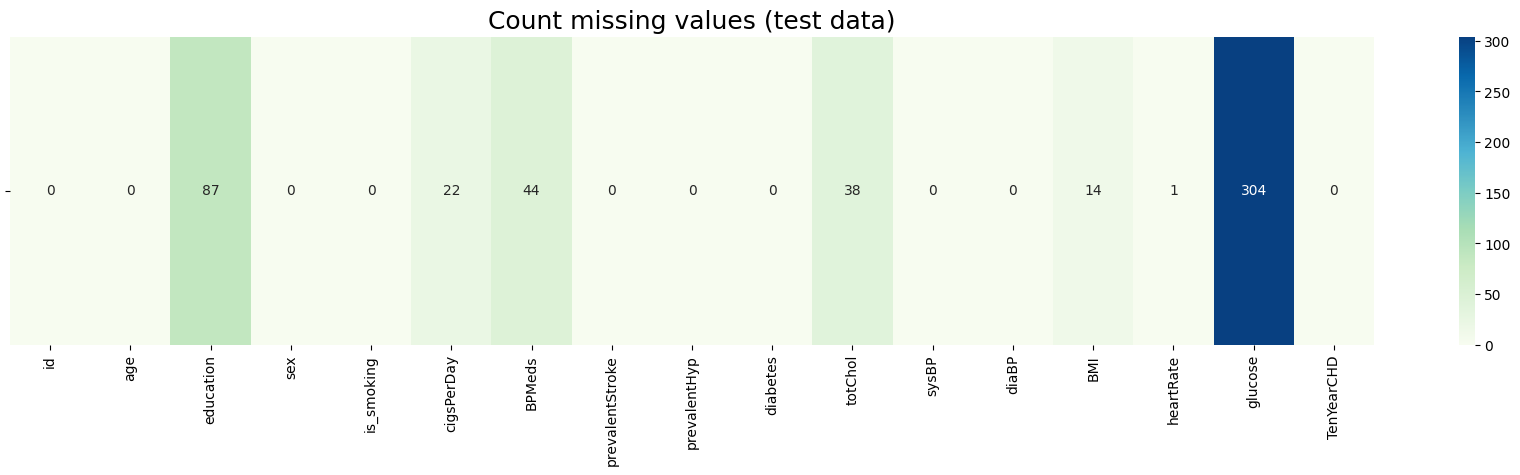

In [10]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)
plt.show()

In [11]:
print(df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [12]:
# Missing values
(df.isnull().sum()/data.shape[0]*100).to_frame().rename(columns={0: 'Null %'})

,Null %
id,0.000000
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [13]:
# Fill missing values
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [14]:
df.isnull().sum()


id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
# check invalid values:
for col in df:
    print(f"{col}: {df[col].unique()}\n")

id: [   0    1    2 ... 3387 3388 3389]

age: [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

education: [2. 4. 1. 3.]

sex: ['F' 'M']

is_smoking: ['YES' 'NO']

cigsPerDay: [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

BPMeds: [0. 1.]

prevalentStroke: [0 1]

prevalentHyp: [0 1]

diabetes: [0 1]

totChol: [221. 212. 250. 233. 241. 272. 238. 295. 220. 326. 234. 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 264. 156. 260.
 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165. 302.
 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200. 244.
 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194. 271.
 313. 305. 285. 169. 224. 201. 185. 

In [17]:
# now convert categorical to numerical:
df1 = df.copy()
df1['sex'] = df1.sex.replace(['M', 'F'], [3, 2])
df1['is_smoking'] = df1.is_smoking.replace(['YES', 'NO'], [3, 2])
df1

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,2,3,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,3,2,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,2,3,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,3,3,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,2,3,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,2,2,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,2,2,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,3,3,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,3,2,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [18]:
df1.drop(['id'],axis=1,inplace=True)

In [19]:
df1.corr()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,-0.041882,-0.210997,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395,0.224927
education,-0.170614,1.000000,0.025275,0.030193,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021221,-0.132202,-0.060774,-0.135783,-0.039395,-0.039303,-0.051388
sex,-0.041882,0.025275,1.000000,0.215485,0.329308,-0.043191,-0.011273,0.003072,0.008853,-0.070042,-0.037369,0.058840,0.087093,-0.118707,-0.003016,0.084647
is_smoking,-0.210997,0.030193,0.215485,1.000000,0.763273,-0.037533,-0.043703,-0.119325,-0.053333,-0.047004,-0.145721,-0.124318,-0.172707,0.062152,-0.059353,0.034143
cigsPerDay,-0.191465,0.014078,0.329308,0.763273,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066374,0.068020
BPMeds,0.122114,-0.019880,-0.043191,-0.037533,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061356,0.087349
prevalentStroke,0.059038,-0.031820,-0.011273,-0.043703,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662,0.068627
prevalentHyp,0.308826,-0.081925,0.003072,-0.119325,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962,0.166544
diabetes,0.107875,-0.051895,0.008853,-0.053333,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743,0.103681
totChol,0.271961,-0.021221,-0.070042,-0.047004,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913,0.093605


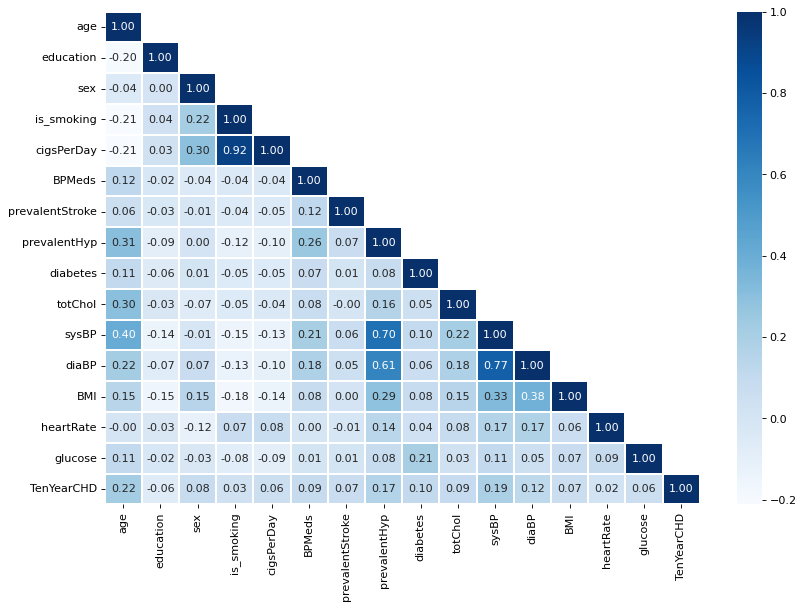

In [20]:
target = 'TenYearCHD'
df_ordered = pd.concat([df1.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.2)
plt.show()

## <span style="color:blue"> *.is smoking related to cigs per day (0.92)* </span>
## <span style="color:blue"> *.prevalentHyp is associated with sysBP and diaBP* </span>
## <span style="color:blue"> *.sysBP is correlated with diaBP (0.77)* </span>
## <span style="color:blue"> *.Diabetes is related to glucose* </span>


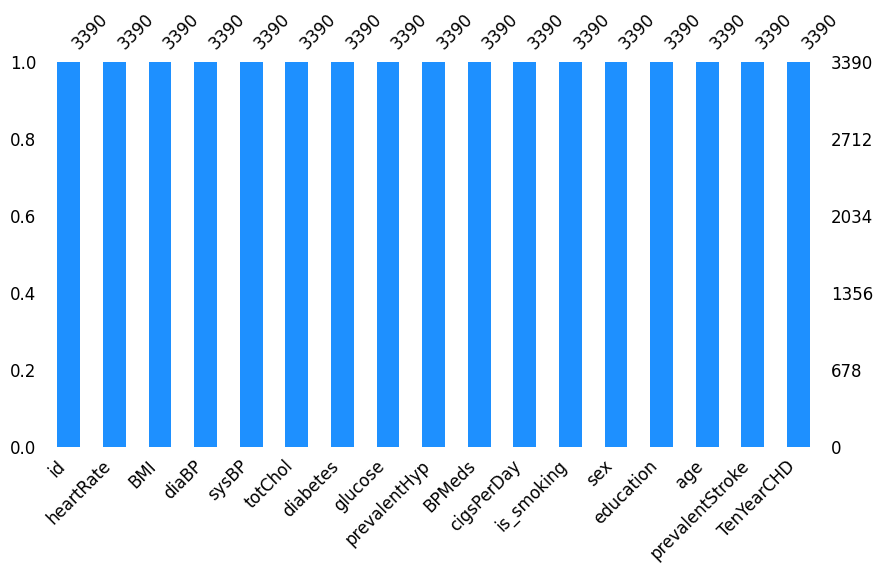

In [21]:
## null count analysis
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [22]:
categorical=['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

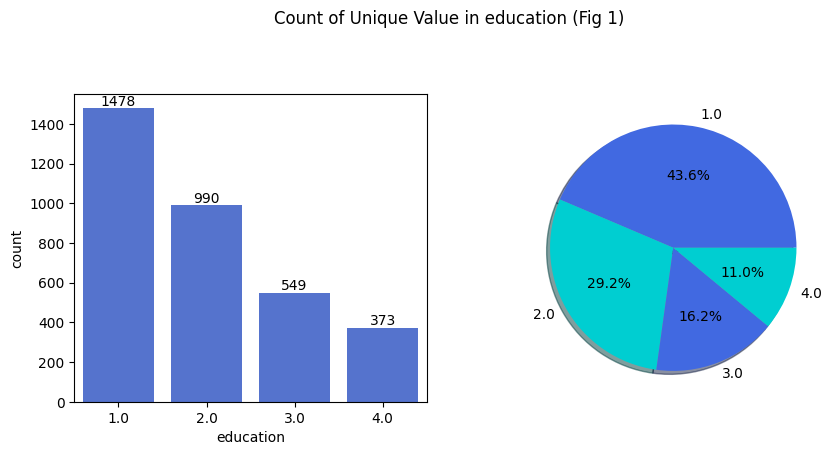

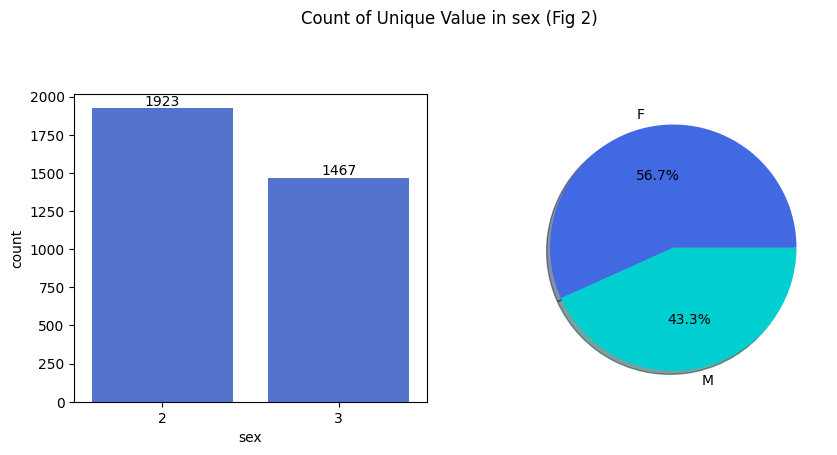

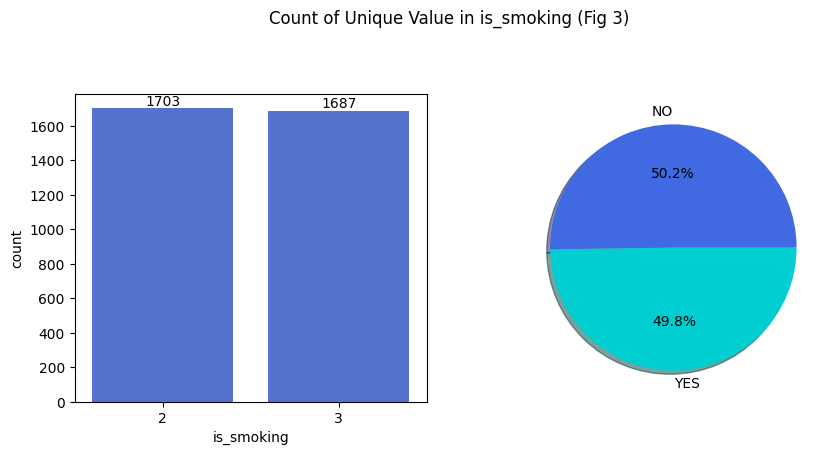

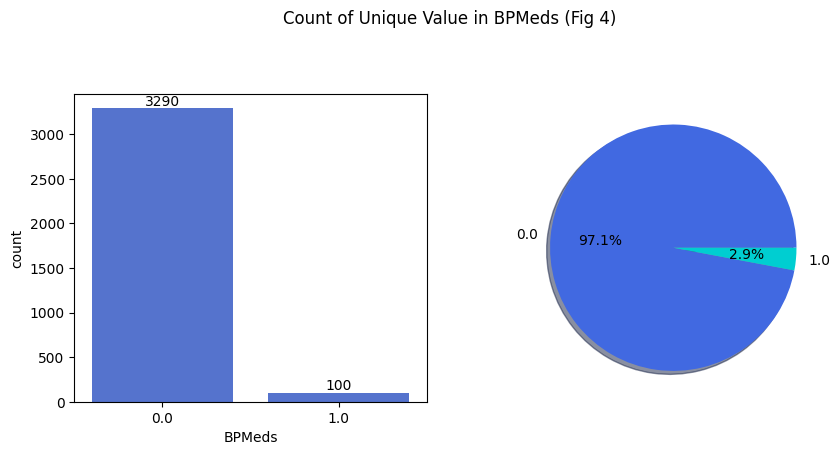

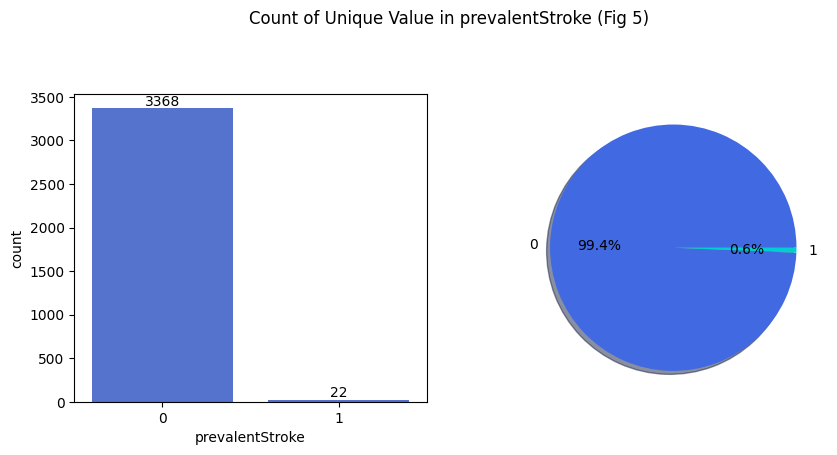

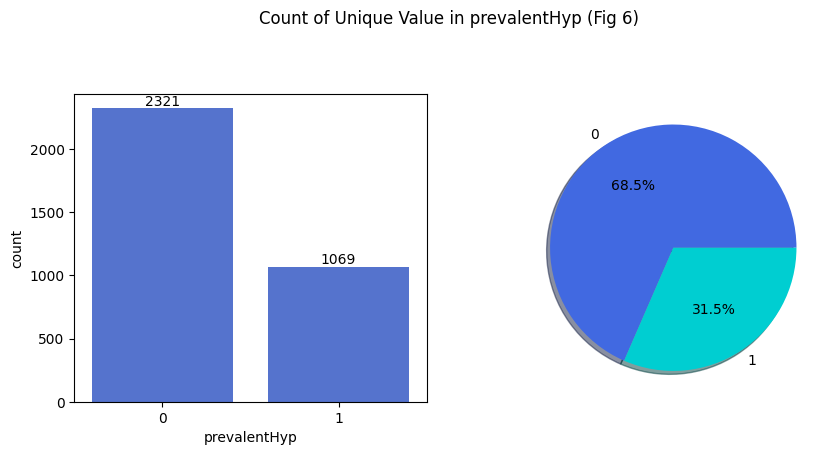

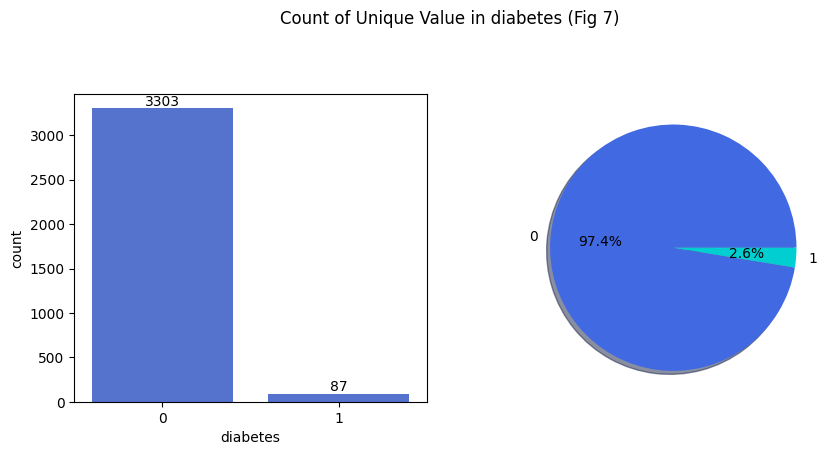

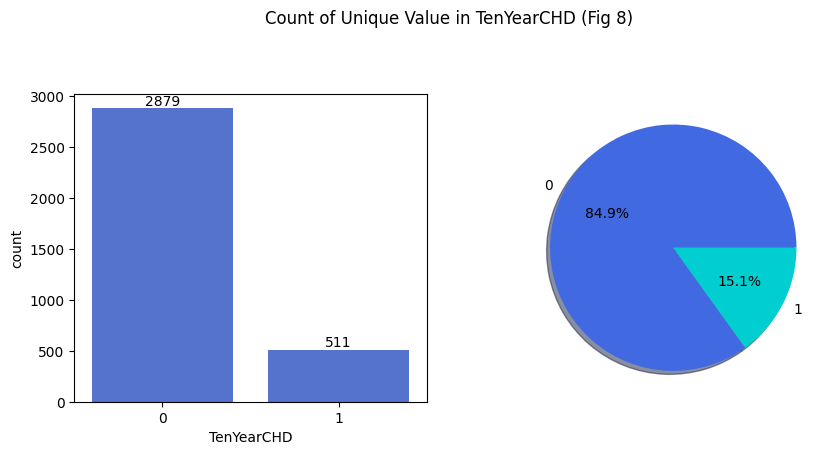

In [23]:
# univariate analysis of categorical data:
sns.set_palette(['royalblue', 'darkturquoise'])
for i, col in enumerate(categorical):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df1, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09)
    plt.show()

##### <span style="color:Purple"> *Dataset basic information:* </span>
##### <span style="color:blue"> *The data has 3390 rows* </span>
### <span style="color:blue"> *We have 16 independent variables and one dependent variable which is TenYearCHD* </span>
### <span style="color:blue"> *We have 8 categorical variables and 8 Nnumerical variables* </span>
### <span style="color:Purple"> categorical:education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes </span>
### <span style="color:Purple">  Nnumerical:prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigsPerDay </span>
### <span style="color:blue"> *It has 501 missing values* </span>


In [24]:
Nnumerical= ['prevalentHyp','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']
Target='TenYearCHD'

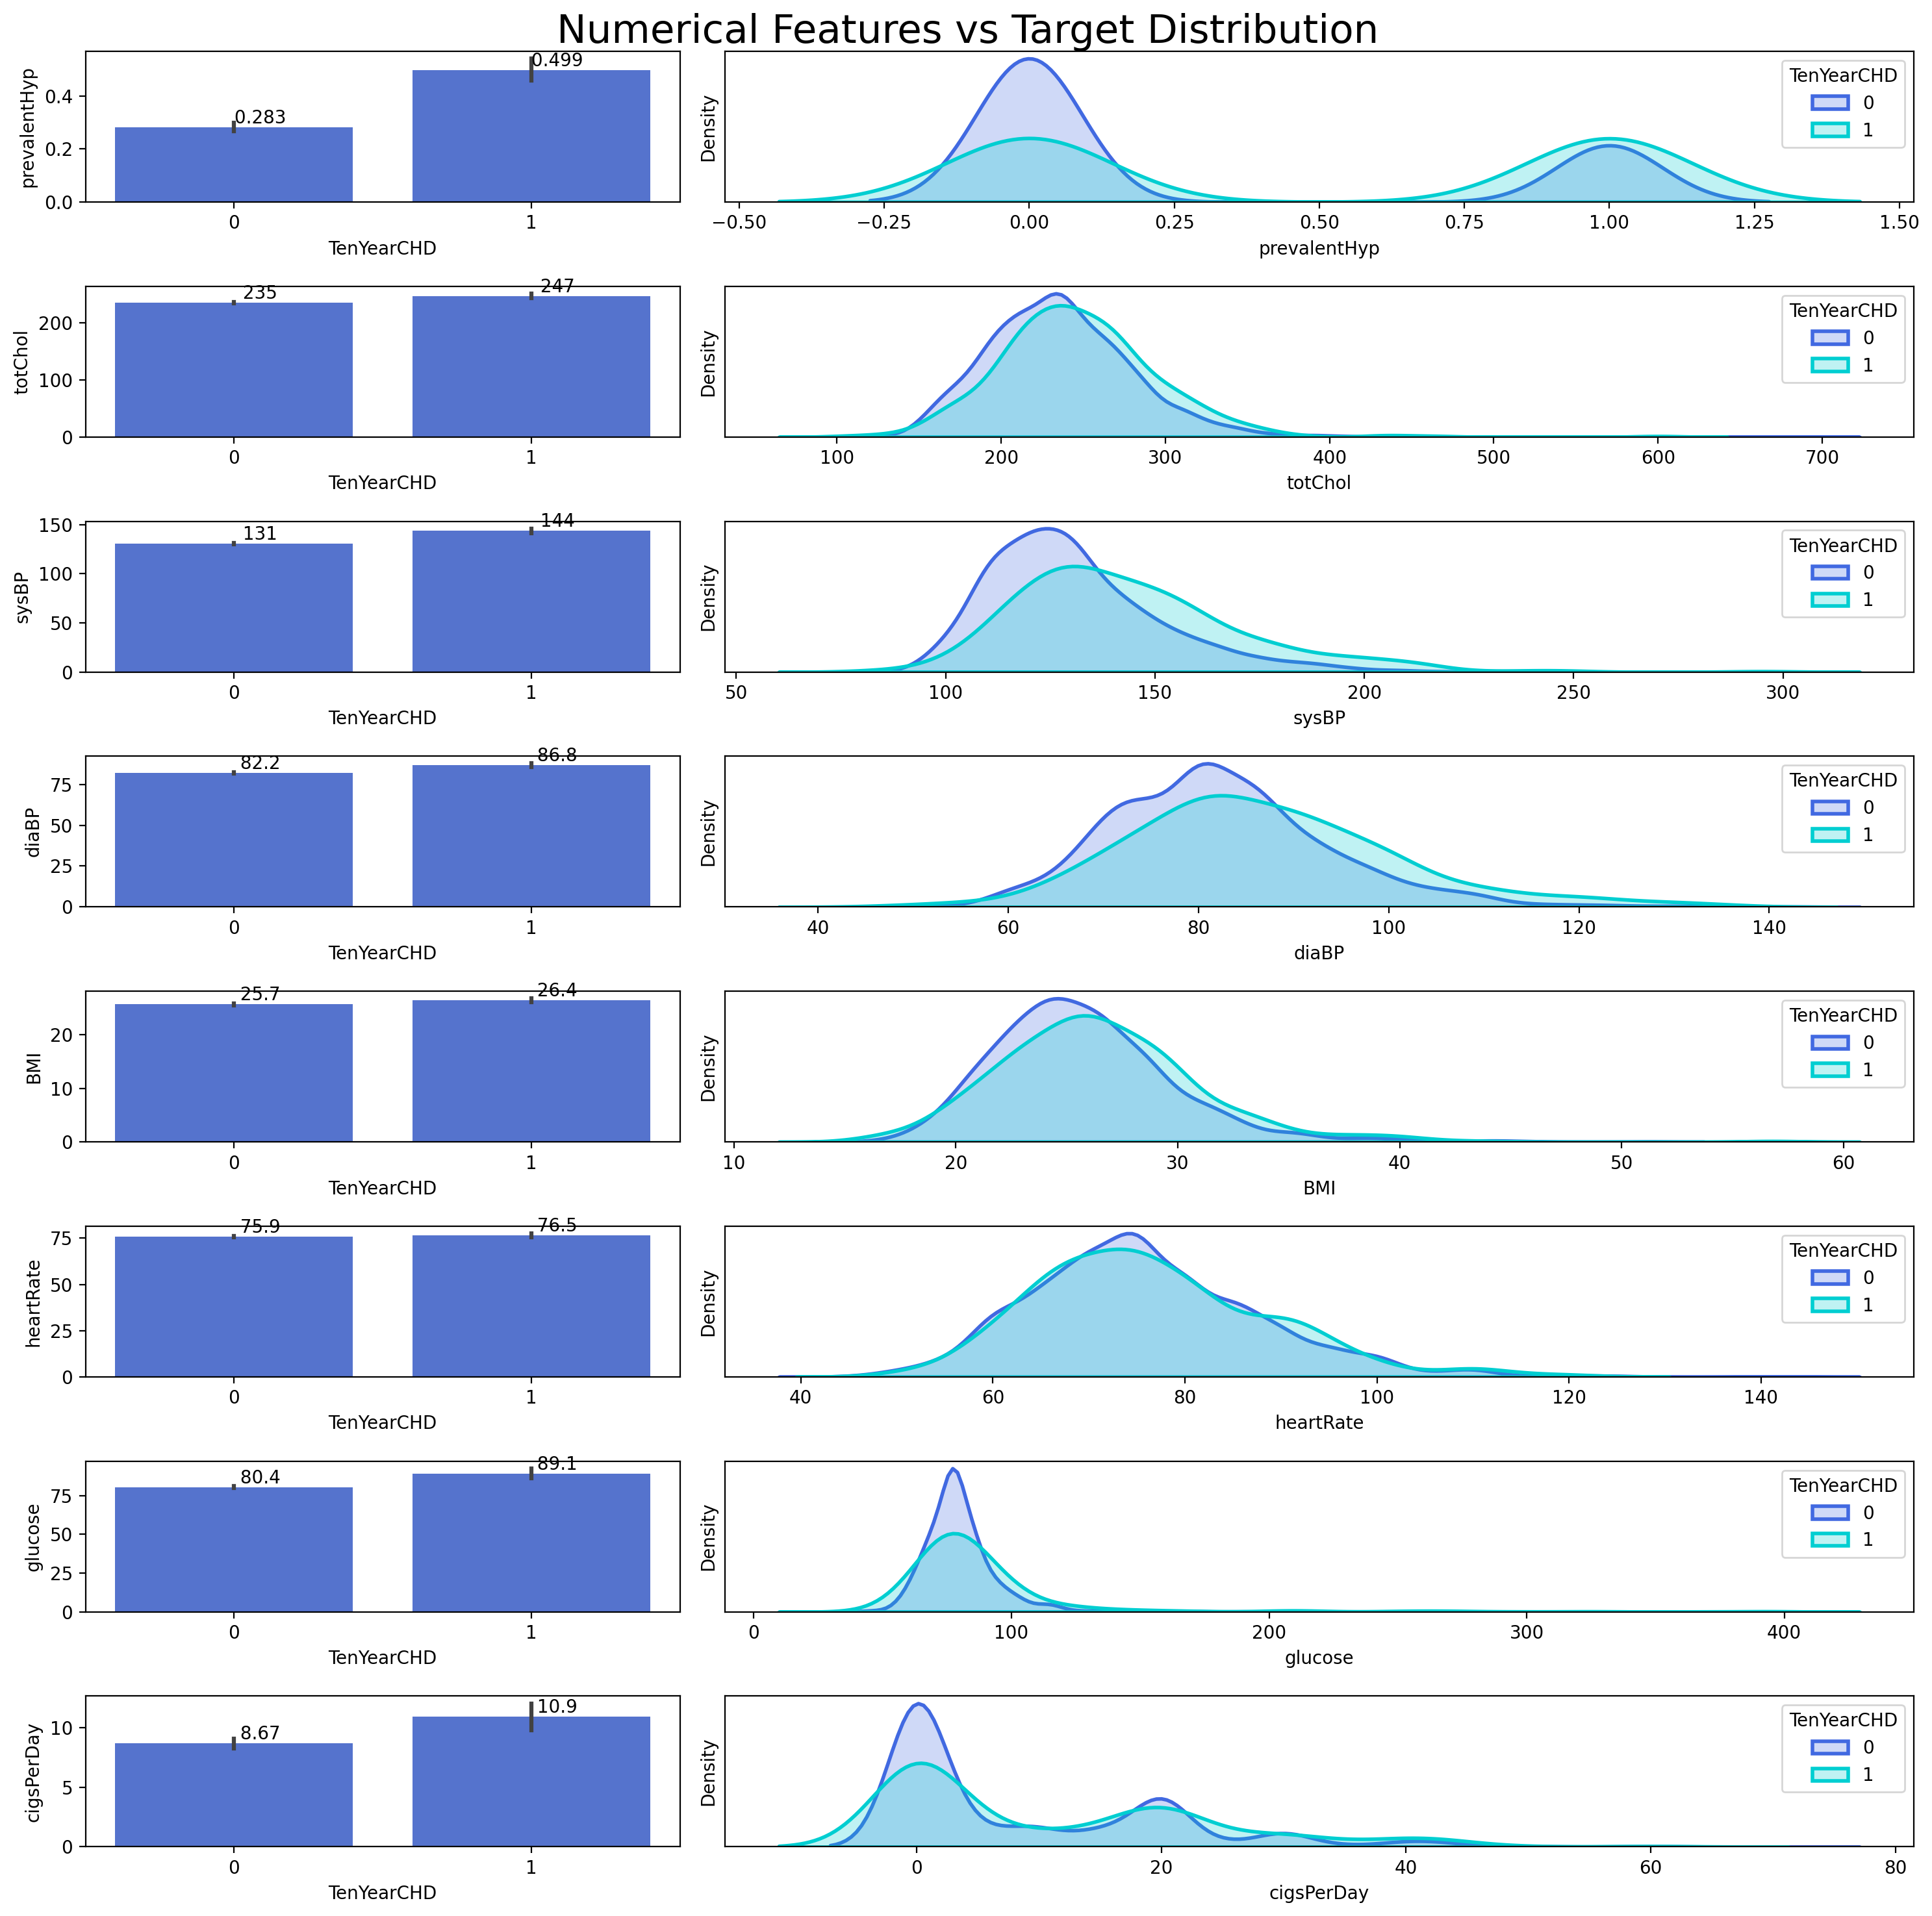

In [25]:
sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(8, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(Nnumerical):
    # barplot
    graph = sns.barplot(data=df1, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df1[df1[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df1[df1[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='TenYearCHD', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

##### <span style="color:Purple"> *The higher the blood pressure, the higher the risk of heart attack, the more balanced the blood pressure, the lower the risk of heart attack* </span>
##### <span style="color:Purple"> *The higher the total cholesterol level, the higher the risk of heart attack in people* </span>
##### <span style="color:Purple"> *The higher the systolic pressure, the higher the risk of stroke* </span>
##### <span style="color:Purple"> *The higher the diastolic pressure, the higher the probability of occurrence* </span>
##### <span style="color:Purple"> *The higher the body mass (BMI), the higher the risk of stroke* </span>
##### <span style="color:Purple"> *The more irregular the heartbeat, the more likely a stroke will occur* </span>
##### <span style="color:Purple"> *The higher the cholesterol, the higher the risk of heart attac* </span>
##### <span style="color:Purple"> *The higher the number of cigarettes consumed per day, the higher the risk of stroke* </span>
##### <span style="color:Purple"> *According to these charts, blood pressure, cholesterol and the number of cigarettes consumed per day are the main factors that increase the incidence of heart attack in people.* </span>


### <span style="color:blue"> Check for Outliers </span>


In [26]:
num_cols = pd.DataFrame (df1, columns= ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'])
cat_cols = pd.DataFrame (df1, columns= ['prevalentHyp','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay'])

In [27]:
# Separate numerical and categorical features into different lists
numerical_columns = list(df1.loc[:,['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']])
categorical_columns = list(df1.loc[:,['prevalentHyp','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']])

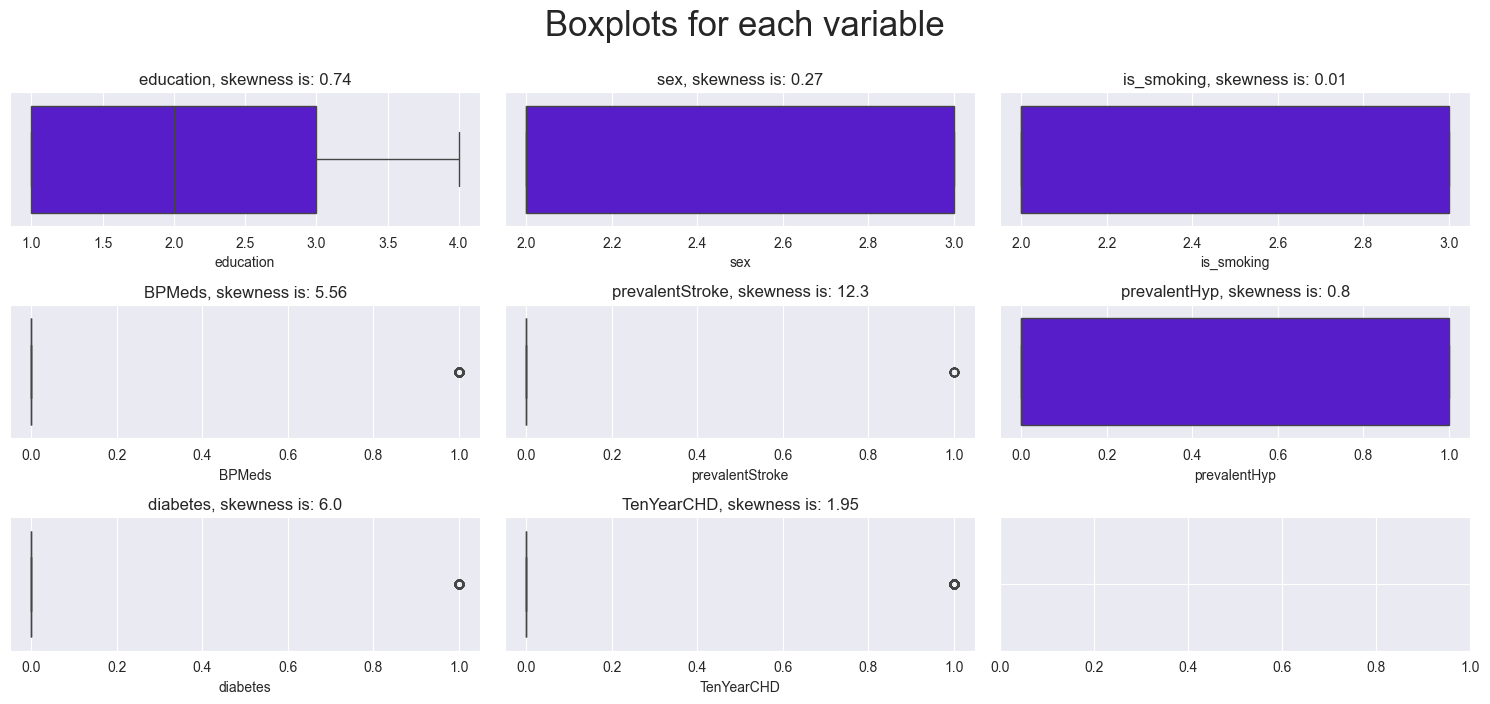

In [28]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#4c00e6', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=df1, columns_list=num_cols, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [29]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0,0,0,100,22,0,87,511


##### <span style="color:Purple"> There are some **Outliers** in the above boxplots in **BPMeds** and **prevalentStroket** and **diabetes** and **TenYearCHD**features given in the above table.</span>


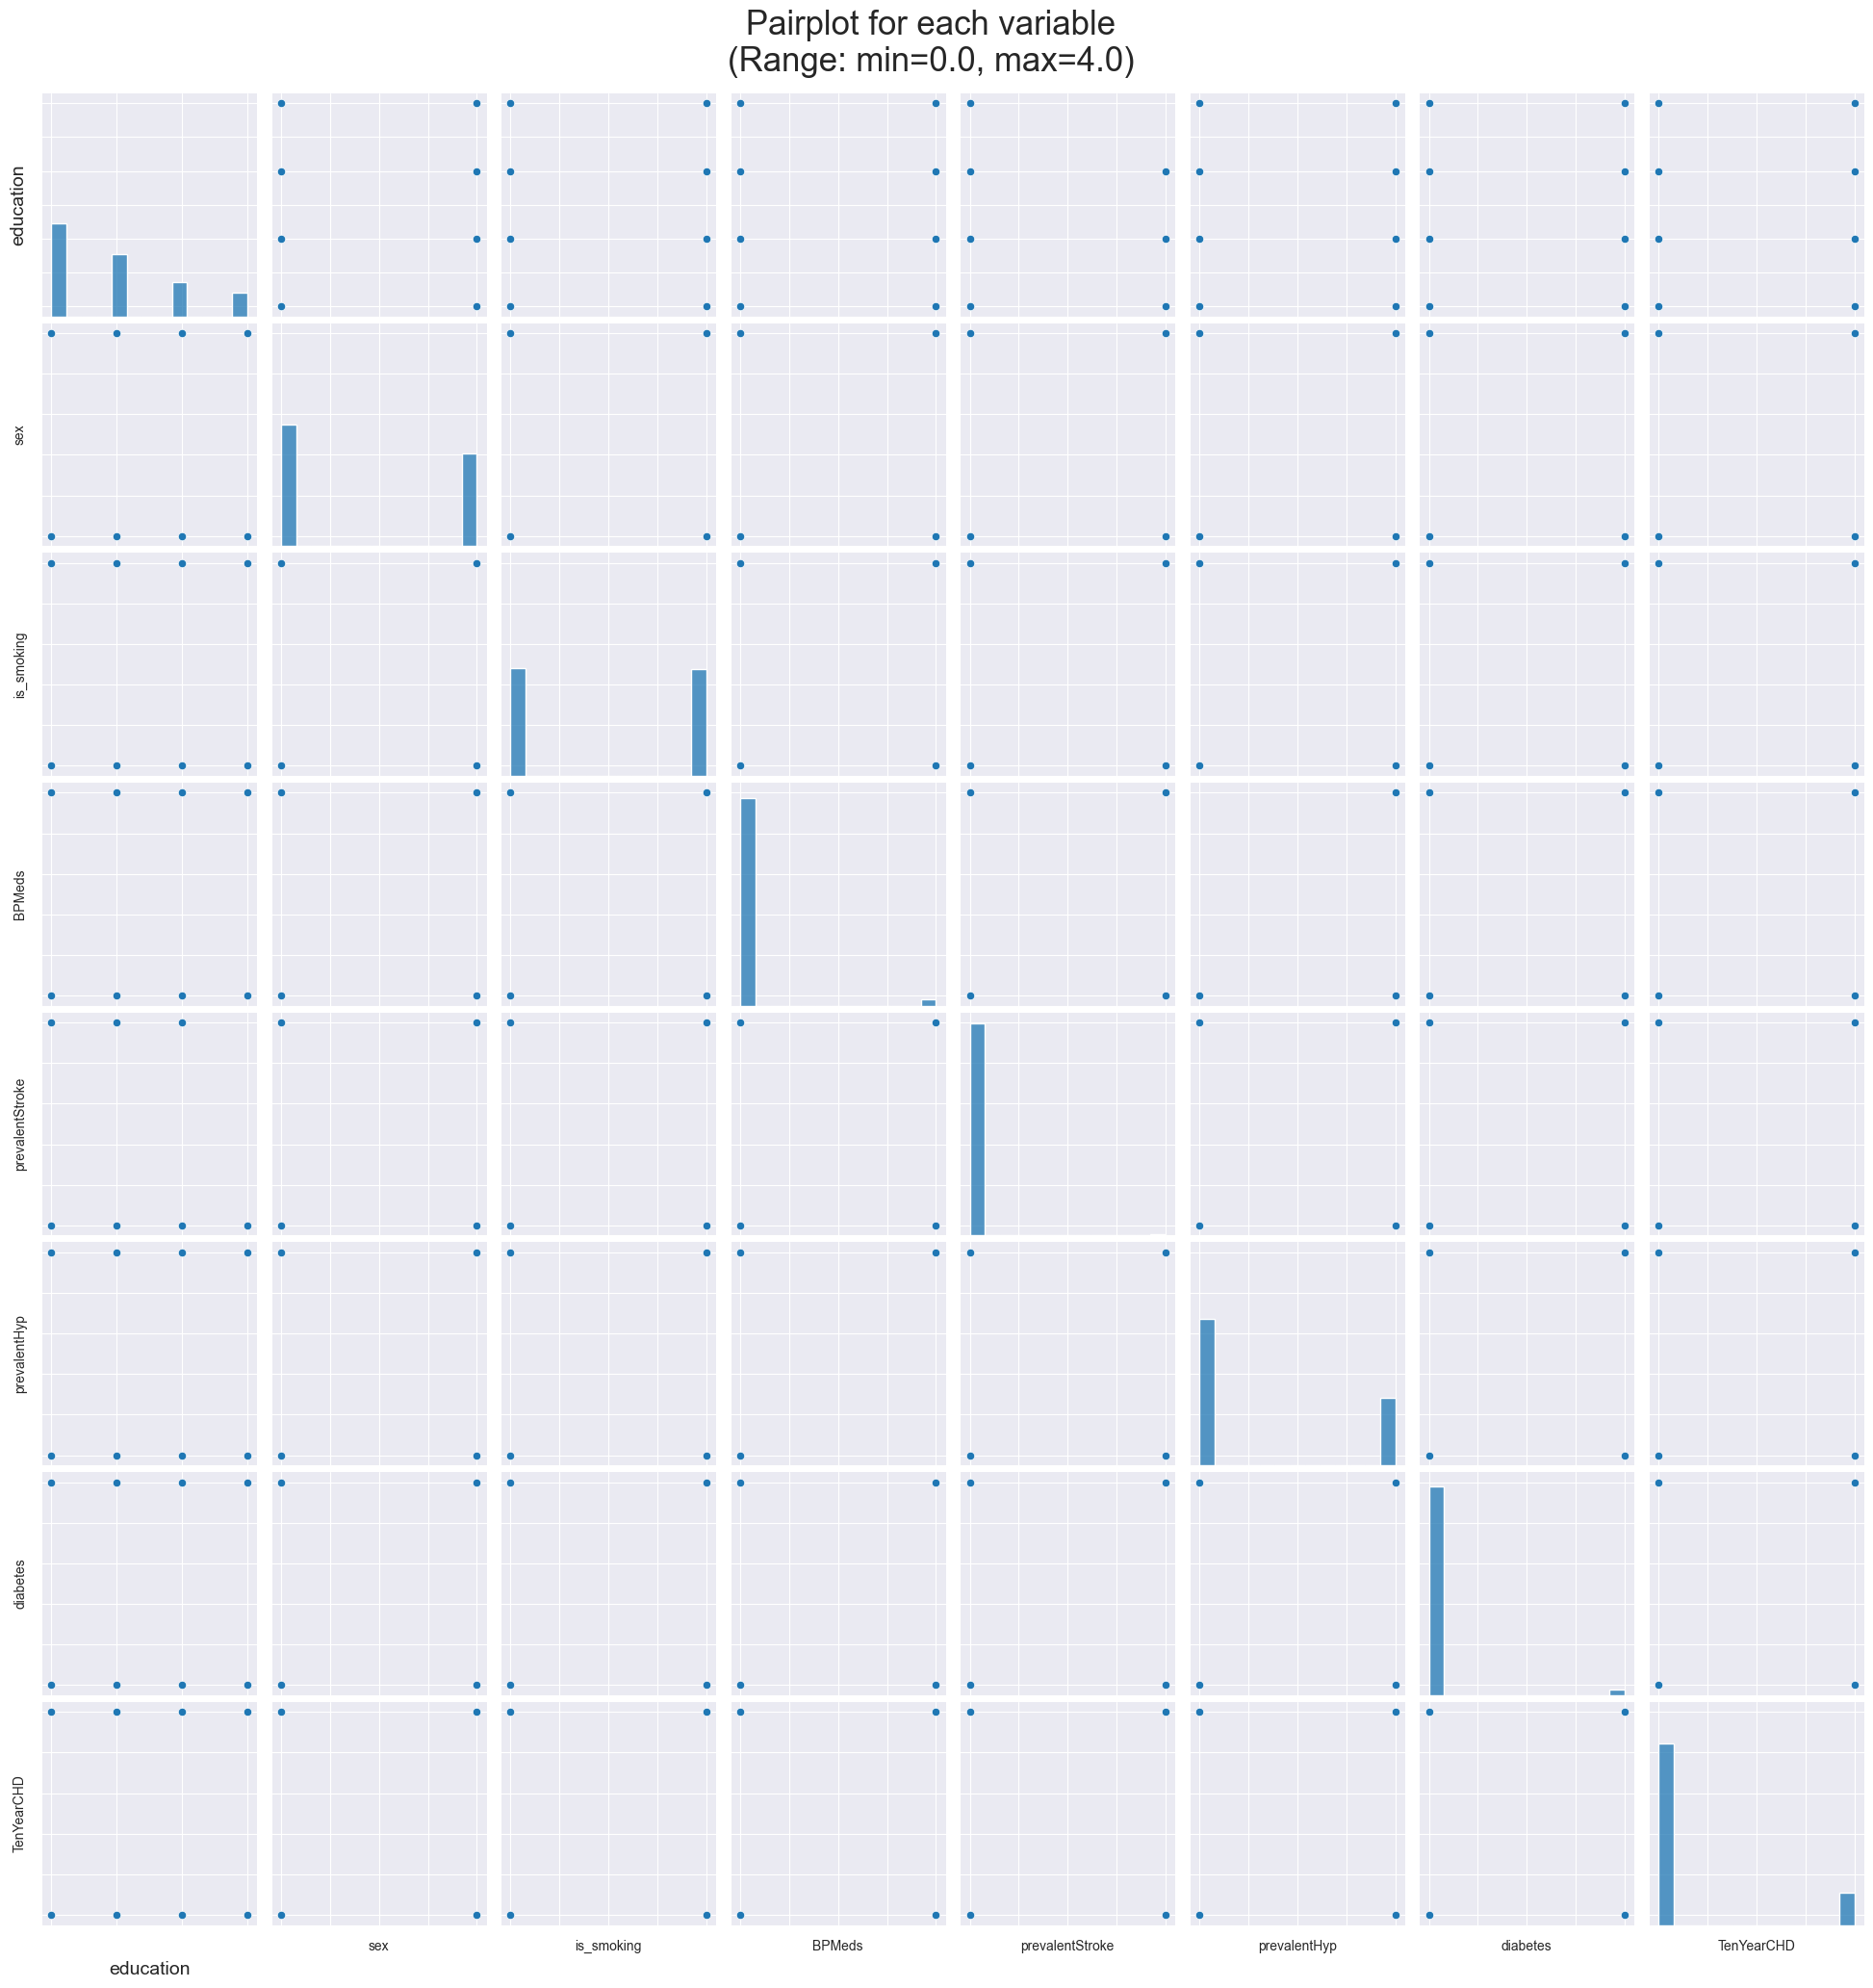

In [30]:
# Check noises by pairplot
sns.set_palette('tab20')
dnp = sns.pairplot(df1.loc[:, numerical_columns])

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].xaxis.labelpad = 20
dnp.axes[-1][-1].yaxis.labelpad = 20

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(df1[numerical_columns].min().min(), df1[numerical_columns].max().max()), y=1.03, fontsize=25)

# Show the plot
plt.show()

# LogisticRegresion

In [31]:
x=df1.drop('TenYearCHD',axis=1)
y=df1['TenYearCHD']

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)
logreg=LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8525073746312685


In [33]:
def logreg(x, y, Testsize):
    df_evaluation = pd.DataFrame(columns=['Test_size', 'acc', 'score'])
    for X in Testsize:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=X, random_state=42)
        logreg = LogisticRegression(solver='liblinear')
        logreg.fit(x_train, y_train)
        y_pred = logreg.predict(x_test)
        
        # Crear un DataFrame temporal para la fila nueva
        new_row = pd.DataFrame({
            'Test_size': [X],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [logreg.score(x, y)]
        })
        
        # Concatenar el DataFrame temporal con el original
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [34]:
def highlight_max (s):
    is_max = s == s.max()
    return ['background-color:blue' if v else '' for v in is_max]

In [35]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=logreg(x,y,[.1,.15,.2,.25,.3,.35])

df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.846608,0.856047
1,0.150000,0.846758,0.855162
2,0.200000,0.864307,0.855752
3,0.250000,0.853774,0.853982
4,0.300000,0.860374,0.855162
5,0.350000,0.865206,0.856342


In [36]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.35, random_state=0)
logreg=LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8508845829823083


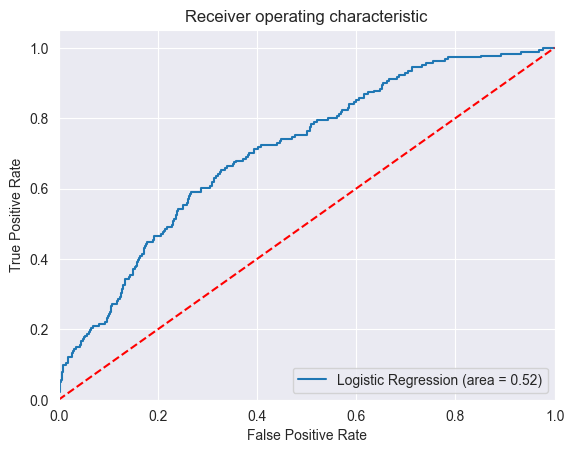

In [37]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
logreg.classes_

array([0, 1], dtype=int64)

In [39]:
print(logreg.intercept_)
print(logreg.coef_)

[-4.5016029]
[[ 0.04051828 -0.08840994  0.18859893 -0.35030645  0.03353943 -0.08115543
   1.06721966  0.34603584  0.15539524  0.00174569  0.01549439 -0.00356941
  -0.031199   -0.01597818  0.00728188]]


In [40]:
logreg.predict_proba(x)

array([[0.87326112, 0.12673888],
       [0.89042658, 0.10957342],
       [0.91987421, 0.08012579],
       ...,
       [0.86248461, 0.13751539],
       [0.68539523, 0.31460477],
       [0.90700585, 0.09299415]])

In [41]:
logreg.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
logreg.score(x,y)

0.8557522123893805

In [43]:
confusion_matrix(y,logreg.predict(x))

array([[2871,    8],
       [ 481,   30]], dtype=int64)

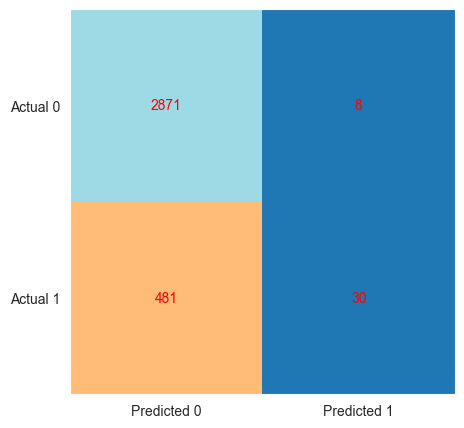

In [44]:
cm = confusion_matrix(y,logreg.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [45]:
print(classification_report(y,logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2879
           1       0.79      0.06      0.11       511

    accuracy                           0.86      3390
   macro avg       0.82      0.53      0.52      3390
weighted avg       0.85      0.86      0.80      3390



In [46]:
model=LogisticRegression(solver='liblinear',C=10.0,random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [47]:
logreg.score(x,y)

0.8557522123893805

##### <span style="color:Purple">logreg.score=0.8563421828908555 .</span>
##### <span style="color:Purple">logreg.counfutionmatrix=       
                           recall    f1-score  support

           0       0.86      1.00      0.92      2879
           1       0.82      0.06      0.11       511

   accuracy                           0.86      3390
  macro avg       0.84      0.53      0.52      3390
 weighted avg       0.85      0.86      0.80      3390.</span>


# GaussianNB

In [48]:
x=df1.drop('TenYearCHD',axis=1)
y=df1['TenYearCHD']

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)
Gn=GaussianNB()
Gn.fit(x_train,y_train)
y_pred=Gn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8126843657817109


In [50]:
def Gn(x, y, Testsize):
    # Crear el DataFrame vacío
    df_evaluation = pd.DataFrame(columns=['Test_size', 'acc', 'score'])
    
    for X in Testsize:
        # Dividir los datos en conjunto de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=X, random_state=42)
        
        # Inicializar el modelo GaussianNB
        Gn = GaussianNB()
        Gn.fit(x_train, y_train)
        y_pred = Gn.predict(x_test)
        
        # Crear un nuevo DataFrame con los resultados de esta iteración
        new_row = pd.DataFrame({
            'Test_size': [X],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [Gn.score(x, y)]
        })
        
        # Concatenar con el DataFrame original
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [51]:
def highlight_max (s):
    is_max = s == s.max()
    return ['background-color:blue' if v else '' for v in is_max]

In [52]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=Gn(x,y,[.1,.15,.2,.25,.3,.35])

df_evaluation.style.apply (highlight_max)

,Test_size,acc,score
0,0.100000,0.831858,0.829794
1,0.150000,0.827112,0.829794
2,0.200000,0.837758,0.829499
3,0.250000,0.830189,0.829204
4,0.300000,0.834808,0.828614
5,0.350000,0.832350,0.828024


In [53]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.35, random_state=0)

In [54]:
Gn=GaussianNB()
Gn=Gn.fit(x_train,y_train)
y_pred=Gn.predict(x_test)

In [55]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8121314237573716


In [56]:
confusion_matrix(y,Gn.predict(x))

array([[2686,  193],
       [ 401,  110]], dtype=int64)

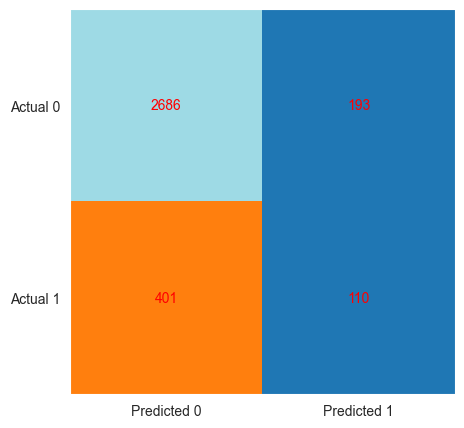

In [57]:
cm = confusion_matrix(y,Gn.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [58]:
print(classification_report(y,Gn.predict(x)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2879
           1       0.36      0.22      0.27       511

    accuracy                           0.82      3390
   macro avg       0.62      0.57      0.59      3390
weighted avg       0.79      0.82      0.81      3390



In [59]:
Gn.score(x,y)

0.8247787610619469

##### <span style="color:Purple">Gn.score=0.8247787610619469 .</span>
##### <span style="color:Purple">Gn.counfutionmatrix=      
                precision    recall  f1-score   support

           0       0.87      0.93      0.90      2879
           1       0.36      0.22      0.27       511

    accuracy                           0.82      3390
   macro avg       0.62      0.57      0.59      3390
weighted avg       0.79      0.82      0.81      3390


# Naive Bayes

In [60]:
x=df1.drop('TenYearCHD',axis=1)
y=df1['TenYearCHD']


In [61]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8230088495575221


In [62]:
def clf(x, y, Testsize):
    # Crear un DataFrame vacío
    df_evaluation = pd.DataFrame(columns=['Test_size', 'acc', 'score'])
    
    for X in Testsize:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=X, random_state=42)
        
        # Inicializar el modelo KNeighborsClassifier
        clf = KNeighborsClassifier()
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Crear un nuevo DataFrame para los resultados de esta iteración
        new_row = pd.DataFrame({
            'Test_size': [X],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [clf.score(x, y)]
        })
        
        # Concatenar el nuevo DataFrame con el original
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [63]:
def highlight_max (s):
    is_max = s == s.max()
    return ['background-color:blue' if v else '' for v in is_max]

In [64]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=clf(x,y,[.1,.15,.2,.25,.3,.35])

df_evaluation.style.apply (highlight_max)

,Test_size,acc,score
0,0.100000,0.831858,0.864012
1,0.150000,0.842829,0.863717
2,0.200000,0.851032,0.861062
3,0.250000,0.830189,0.857817
4,0.300000,0.838741,0.854867
5,0.350000,0.840775,0.853687


In [65]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=0)

In [66]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.831858407079646


In [67]:
confusion_matrix(y,clf.predict(x))

array([[2833,   46],
       [ 411,  100]], dtype=int64)

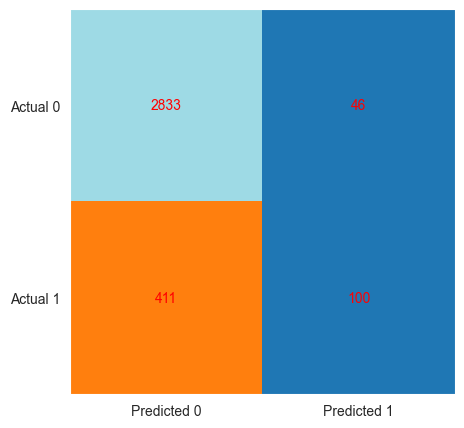

In [68]:
cm = confusion_matrix(y,clf.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [69]:
print(classification_report(y,clf.predict(x)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2879
           1       0.68      0.20      0.30       511

    accuracy                           0.87      3390
   macro avg       0.78      0.59      0.61      3390
weighted avg       0.84      0.87      0.83      3390



In [70]:
clf.score(x,y)

0.8651917404129793

##### <span style="color:Purple">clf.score=0.8651917404129793 .</span>
##### <span style="color:Purple">clf.counfutionmatrix=      
                precision    recall  f1-score   support

           0       0.87      0.98      0.93      2879
           1       0.68      0.20      0.30       511

    accuracy                           0.87      3390
   macro avg       0.78      0.59      0.61      3390
weighted avg       0.84      0.87      0.83      3390


# DecisionTree

In [71]:
x=df1.drop('TenYearCHD',axis=1)
y=df1['TenYearCHD']


In [72]:
def DTs(x, y, test_sizes):
    # Crear un DataFrame vacío con las columnas adecuadas
    df_evaluation = pd.DataFrame(columns=['test_size', 'acc', 'score'])
    
    for test_size in test_sizes:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=5)
        
        # Inicializar y entrenar el modelo DecisionTreeClassifier
        model = DecisionTreeClassifier(criterion='gini')  # Cambiar a 'entropy' si es necesario
        model.fit(x_train, y_train)
        
        # Realizar predicciones
        y_pred = model.predict(x_test)
        
        # Crear un nuevo DataFrame con los resultados
        new_row = pd.DataFrame({
            'test_size': [test_size],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [model.score(x, y)]
        })
        
        # Concatenar el nuevo DataFrame con el existente
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [73]:
def highlight_max (s):
    is_max = s == s.max()
    return ['background-color:blue' if v else '' for v in is_max]

In [74]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=DTs(x,y,[.1,.15,.2,.25,.3,.35])

df_evaluation.style.apply (highlight_max)

,test_size,acc,score
0,0.100000,0.752212,0.975221
1,0.150000,0.754420,0.963127
2,0.200000,0.731563,0.946313
3,0.250000,0.722877,0.930678
4,0.300000,0.744346,0.923304
5,0.350000,0.754002,0.913864


In [75]:
def DTs(x, y, criterion):
    # Crear un DataFrame vacío con columnas específicas
    df_evaluation = pd.DataFrame(columns=['criterion', 'acc', 'score'])
    
    for X in criterion:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)
        
        # Inicializar y entrenar el modelo DecisionTreeClassifier
        model = DecisionTreeClassifier(criterion=X)
        model.fit(x_train, y_train)
        
        # Realizar predicciones
        y_pred = model.predict(x_test)
        
        # Crear un nuevo DataFrame con los resultados
        new_row = pd.DataFrame({
            'criterion': [X],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [model.score(x, y)]
        })
        
        # Concatenar el nuevo DataFrame con el existente
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [76]:
def highlight_max (s):
    is_max=s==s.max()
    return ['background-color:blue'if v else '' for v in is_max]

In [77]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=DTs(x,y,['gini','entropy'])

df_evaluation.style.apply(highlight_max)

,criterion,acc,score
0,gini,0.766962,0.976696
1,entropy,0.764012,0.976401


In [78]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=0)

In [79]:
DTs=DecisionTreeClassifier(criterion='gini', random_state=0)
DTs.fit(x_train,y_train)
y_pred=DTs.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7492625368731564


In [80]:
confusion_matrix(y,DTs.predict(x))

array([[2829,   50],
       [  35,  476]], dtype=int64)

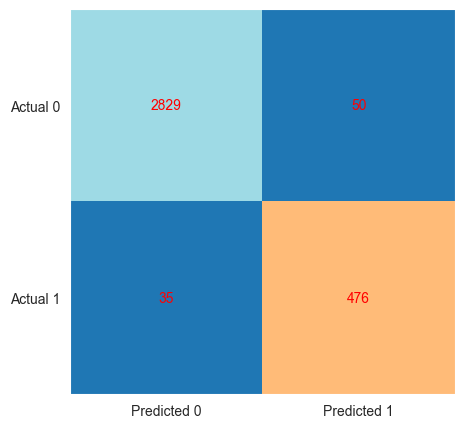

In [81]:
cm = confusion_matrix(y,DTs.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [82]:
from sklearn import tree

text_representation=tree.export_text(DTs)
print(text_representation)

|--- feature_0 <= 50.50
|   |--- feature_10 <= 192.00
|   |   |--- feature_0 <= 46.50
|   |   |   |--- feature_4 <= 19.50
|   |   |   |   |--- feature_9 <= 458.50
|   |   |   |   |   |--- feature_14 <= 230.00
|   |   |   |   |   |   |--- feature_9 <= 304.50
|   |   |   |   |   |   |   |--- feature_0 <= 42.50
|   |   |   |   |   |   |   |   |--- feature_11 <= 109.25
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 39.81
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= 121.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_14 >  121.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_12 >  39.81
|   |   |   |   |   |   |   |   |   |   |--- feature_12 <= 40.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_12 >  40.16
|   |   |   |   |   |   |   |   |  

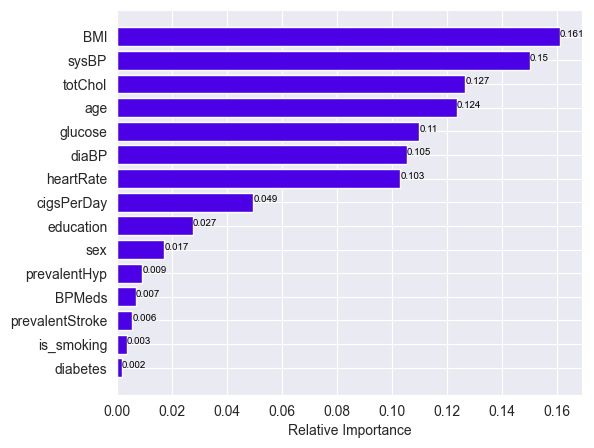

In [83]:
# Get feature importances from the DesionTree
feature_names = x.columns
target_names = ["0", "1", "2", "3"]

importances = DTs.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#4c00e6', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

In [84]:
# Define model
model = DecisionTreeClassifier()

# Define evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters
max_depth = range(2, 20, 1)
criterion = ['entropy', 'gini']

param_grid = {'max_depth': max_depth, 'criterion': criterion}

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
search_result = search.fit(x_train, y_train)

# Set the model to the best combination of parameters
DTscv = search_result.best_estimator_

# Summarize result
print('Best Score: %s' % search_result.best_score_)
print('Best Hyperparameters: %s' % search_result.best_params_)

Best Score: 0.8494481945783774
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 2}


In [93]:
y_pred = DTscv.predict(x_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8378


In [94]:
print(confusion_matrix(y,DTs.predict(x)))

print(classification_report(y,DTs.predict(x)))

[[2829   50]
 [  35  476]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2879
           1       0.90      0.93      0.92       511

    accuracy                           0.97      3390
   macro avg       0.95      0.96      0.95      3390
weighted avg       0.98      0.97      0.98      3390



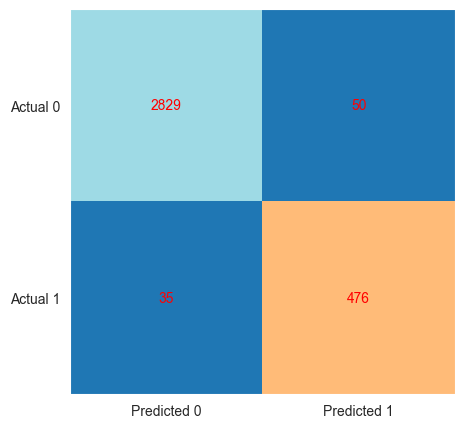

In [95]:
cm = confusion_matrix(y,DTs.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [96]:
DTs.score(x,y)

0.9749262536873157

##### <span style="color:Purple">knn.score=0.9749262536873157.</span>
##### <span style="color:Purple">knn.counfutionmatrix=      
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2879
           1       0.90      0.93      0.92       511

    accuracy                           0.97      3390
   macro avg       0.95      0.96      0.95      3390
weighted avg       0.98      0.97      0.98      3390


# RandomForest 

In [97]:
x=df1.drop('TenYearCHD',axis=1)
y=df1['TenYearCHD']


In [101]:
def RF(x, y, test_sizes):
    # Crear un DataFrame vacío con las columnas adecuadas
    df_evaluation = pd.DataFrame(columns=['Test_size', 'acc', 'score'])
    
    for test_size in test_sizes:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=5)
        
        # Inicializar y entrenar el modelo KNeighborsClassifier
        model = KNeighborsClassifier()
        model.fit(x_train, y_train)
        
        # Realizar predicciones
        y_pred = model.predict(x_test)
        
        # Crear un nuevo DataFrame con los resultados
        new_row = pd.DataFrame({
            'Test_size': [test_size],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [model.score(x, y)]
        })
        
        # Concatenar el nuevo DataFrame con el existente
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [102]:
def highlight_max (s):
    is_max = s == s.max()
    return ['background-color:blue' if v else '' for v in is_max]

In [103]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=RF(x,y,[.1,.15,.2,.25,.3,.35])

df_evaluation.style.apply (highlight_max)

,Test_size,acc,score
0,0.100000,0.831858,0.866372
1,0.150000,0.827112,0.863127
2,0.200000,0.825959,0.860177
3,0.250000,0.820755,0.857817
4,0.300000,0.824975,0.854277
5,0.350000,0.823083,0.854277


In [107]:
def RF(x, y, n_estimators_list):
    # Crear un DataFrame vacío con las columnas adecuadas
    df_evaluation = pd.DataFrame(columns=['n_estimators', 'acc', 'score'])
    
    for n_estimators in n_estimators_list:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
        
        # Inicializar y entrenar el modelo RandomForestClassifier
        RF = RandomForestClassifier(n_estimators=n_estimators)
        RF.fit(x_train, y_train)
        
        # Realizar predicciones
        y_pred = RF.predict(x_test)
        
        # Crear un nuevo DataFrame con los resultados
        new_row = pd.DataFrame({
            'n_estimators': [n_estimators],
            'acc': [metrics.accuracy_score(y_test, y_pred)],
            'score': [RF.score(x, y)]
        })
        
        # Concatenar el nuevo DataFrame con el existente
        df_evaluation = pd.concat([df_evaluation, new_row], ignore_index=True)
    
    return x_train, x_test, y_train, y_test, y_pred, df_evaluation

In [108]:
def highlight_max (s):
    is_max=s==s.max()
    return ['background-color:blue'if v else '' for v in is_max]

In [109]:
x_train, x_test, y_train, y_test,y_pred,df_evaluation=RF(x,y,[50,100,150,200])

df_evaluation.style.apply(highlight_max)

,n_estimators,acc,score
0,50,0.840708,0.967847
1,100,0.840708,0.968142
2,150,0.837758,0.967552
3,200,0.845133,0.969027


In [110]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=0)

In [111]:
RF=RandomForestClassifier(n_estimators=200)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.831858407079646


In [113]:
confusion_matrix(y,RF.predict(x))

array([[2876,    3],
       [  54,  457]], dtype=int64)

In [114]:
print(classification_report(y,RF.predict(x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2879
           1       0.99      0.89      0.94       511

    accuracy                           0.98      3390
   macro avg       0.99      0.95      0.97      3390
weighted avg       0.98      0.98      0.98      3390



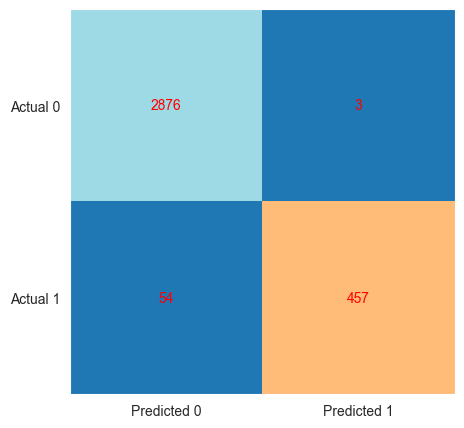

In [115]:
cm = confusion_matrix(y,RF.predict(x))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

In [116]:
feature_names = x.columns
target_names = ["0", "1", "2", "3"]

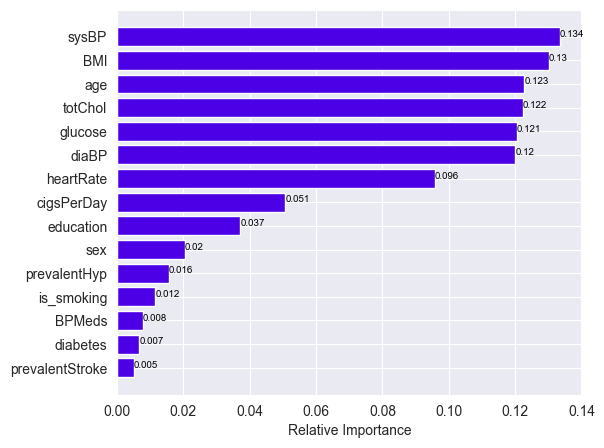

In [117]:
# Get feature importances from the Random Forest model
importances = RF.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#4c00e6', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

In [118]:
RF.score(x,y)

0.9831858407079646

##### <span style="color:Purple">RF.score=0.9837758112094396.</span>
##### <span style="color:Purple">knn.counfutionmatrix=      
                precision    recall  f1-score   support

           0       0.98      1.00      0.99      2879
           1       1.00      0.90      0.94       511

    accuracy                           0.98      3390
   macro avg       0.99      0.95      0.97      3390
weighted avg       0.98      0.98      0.98      3390